### Assignment Mini-Challenge 01

> To use [QuickDraw dataset](https://quickdraw.withgoogle.com) to do image classification with CNN

Below is the implementation with Keras using TF 

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler
import keras.backend as K
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten,Input, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
print(keras.__version__)
print(tf.__version__)

2.0.8
1.5.0-dev20171016


we use **40 classes** and **10K dataset**

In [4]:
classes40 = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe',
             'banana','bandage','barn','baseball bat','baseball','basket','basketball',
             'bathtub','beach','bear','beard','bed','bee','belt','bicycle','binoculars',
             'birthday cake','blueberry','book','boomerang','bottlecap','bowtie',
             'bracelet','brain','bread','broom','bulldozer','bus','bus','butterfly',
             'cactus','cake']
num_classes = len(classes40)

In [5]:
num_examples_per_class = 10000 # 10k dataset

In [6]:
x_data = np.load('data/x_data_40_classes_10k.npy')

In [7]:
labels = [np.full((num_examples_per_class,), classes40.index(qdraw)) for qdraw in classes40]

y_data = np.concatenate(labels,axis=0)

In [8]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

we shuffle the train and validation data 

In [9]:
x_data, y_data = unison_shuffled_copies(x_data, y_data)

In [10]:
img_rows = 28
img_cols = 28

total_size = x_data.shape[0]

num_pred = int(0.1 * total_size)              # set 10 % for testing 
num_validate = int(0.35 * total_size)          # set 35 % for validation
num_train = int(0.55 * total_size)             # set 55 % for training

x_train = x_data[0:num_train]
y_train = y_data[0:num_train]

x_test = x_data[num_train:(num_train+num_validate)]
y_test = y_data[num_train:(num_train+num_validate)]

x_pred = x_data[(num_train+num_validate):]
y_pred = y_data[(num_train+num_validate):]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_pred = x_pred.reshape(x_pred.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_pred = x_pred.astype('float32')

# normalize the image to 0 to 1
x_train /= 255   
x_test /= 255
x_pred /= 255

print(x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_pred.shape[0], 'pred samples')

(220000, 28, 28, 1)
220000 train samples
140000 test samples
40000 pred samples


Hot encoding for the labels

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
Inp = Input(input_shape) # 8000, 28, 28, 1
x = Conv2D(32, kernel_size=(3, 3), activation='relu', name='Conv_01')(Inp)
x = Conv2D(32, (3, 3), activation='relu', name='Conv_02')(x)
x = MaxPooling2D(pool_size=(2, 2), name = 'MaxPool_01')(x)
x = Dropout(0.3, name='Dropout_01')(x)
x = Flatten(name='Flatten_01')(x)
x = Dense(64, activation='relu', name='Dense_01')(x)
x = BatchNormalization()(x)
x = Dropout(0.25, name = 'Dropout_02')(x)
output = Dense(num_classes, activation='softmax', name='Dense_02')(x)
model = Model(Inp, output)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 32)        9248      
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 32)        0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
Flatten_01 (Flatten)         (None, 4608)              0         
_________________________________________________________________
Dense_01 (Dense)             (None, 64)                294976    
__________

In [14]:
train_epochs = 40
batch_sizes = 1024

In [15]:
def step_decay(epoch):
    if epoch<7:
        return 0.003    
    if epoch<15:
        return 0.0015
    if epoch<35:
        return 0.001   
    return 0.0005

lrate=LearningRateScheduler(step_decay)

In [16]:
adam = keras.optimizers.Adam()
model.compile( loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'] )

#### Ready to train..

In [17]:
history = model.fit(x_train, y_train, 
                    batch_size = batch_sizes, 
                    epochs = train_epochs, verbose = 1, 
                    validation_data=(x_test, y_test), 
                    callbacks=[lrate])


Train on 220000 samples, validate on 140000 samples
Epoch 1/40
220000/220000 [==============================] - 36s - loss: 1.5039 - acc: 0.6092 - val_loss: 1.2765 - val_acc: 0.7229
Epoch 2/40
220000/220000 [==============================] - 34s - loss: 1.0433 - acc: 0.7194 - val_loss: 0.8962 - val_acc: 0.7582
Epoch 3/40
220000/220000 [==============================] - 35s - loss: 0.9538 - acc: 0.7416 - val_loss: 0.8106 - val_acc: 0.7803
Epoch 4/40
220000/220000 [==============================] - 36s - loss: 0.9096 - acc: 0.7536 - val_loss: 0.7749 - val_acc: 0.7910
Epoch 5/40
220000/220000 [==============================] - 36s - loss: 0.8771 - acc: 0.7610 - val_loss: 0.7487 - val_acc: 0.7968
Epoch 6/40
220000/220000 [==============================] - 37s - loss: 0.8534 - acc: 0.7671 - val_loss: 0.7338 - val_acc: 0.8016
Epoch 7/40
220000/220000 [==============================] - 37s - loss: 0.8358 - acc: 0.7717 - val_loss: 0.7312 - val_acc: 0.8010
Epoch 8/40
220000/220000 [============

In [18]:
model.save('modelqd.h5')

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

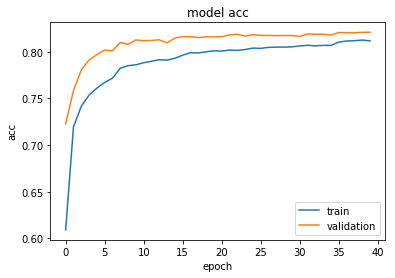

In [20]:
plot_train(history)

In [22]:
evaluation = model.evaluate(x_test, y_test,
          batch_size=batch_sizes)
print('.')
print('Model Accuracy = %.2f' % (evaluation[1]))
print('Model Loss = %.2f' % (evaluation[0]))

139264/140000 [============================>.] - ETA: 0s.
Model Accuracy = 0.82
Model Loss = 0.66


#### Continue the training by changing the learn rate manually

In [75]:
model = keras.models.load_model('modelqd.h5')

train_epochs = 43

In [76]:
def step_decay1(epoch):
    return 0.000001

lrate=LearningRateScheduler(step_decay1)

history1 = model.fit(x_train, y_train, 
                    batch_size = batch_sizes, 
                    epochs = train_epochs, verbose = 1, 
                    initial_epoch = 40,
                    validation_data=(x_test, y_test), 
                    callbacks=[lrate])

Train on 220000 samples, validate on 140000 samples
Epoch 41/43
220000/220000 [==============================] - 36s - loss: 0.6104 - acc: 0.8231 - val_loss: 0.6407 - val_acc: 0.8261
Epoch 42/43
220000/220000 [==============================] - 37s - loss: 0.6109 - acc: 0.8239 - val_loss: 0.6408 - val_acc: 0.8261
Epoch 43/43
220000/220000 [==============================] - 37s - loss: 0.6093 - acc: 0.8236 - val_loss: 0.6408 - val_acc: 0.8261


In [77]:
evaluation = model.evaluate(x_test, y_test,
          batch_size=batch_sizes)
print('.')
print('Model Accuracy = %.2f' % (evaluation[1]))
print('Model Loss = %.2f' % (evaluation[0]))

140000/140000 [==============================] - 6s     
.
Model Accuracy = 0.83
Model Loss = 0.64


In [78]:
model.save('modelqd.h5')

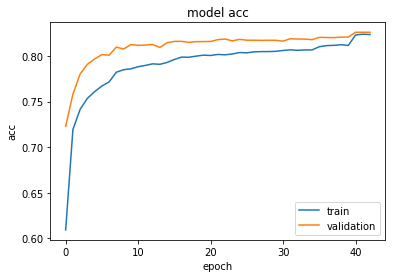

In [95]:
history1.history['acc'] = history.history['acc'] + history1.history['acc']
history1.history['val_acc'] = history.history['val_acc'] + history1.history['val_acc']
plot_train(history1)

#### Let's make predictions

In [96]:
res = model.predict(x_pred)

n_count = 0
i = 0
le = []
for r in res:
    idx = np.argmax(r)
    if idx != y_pred[i]:
        n_count = n_count + 1
        # w = r.argsort()[-3:][::-1]
        # print( classes[y_pred[i]], [classes[y_pred[j]] for j in w] )
    i = i + 1

print('Total error:', n_count, 'out of', x_pred.shape[0], 'or',n_count/x_pred.shape[0]*100,'%')

Total error: 6891 out of 40000 or 17.227500000000003 %


In [97]:
pred_accuracy = (x_pred.shape[0]-n_count) / x_pred.shape[0] * 100
print('Prediction accuracy: %.2f' % pred_accuracy + '% out of', x_pred.shape[0], 'dataset')

Prediction accuracy: 82.77% out of 40000 dataset


The prediction accuracy is **82.77 %** out of 40000 dataset